In [48]:
import timeit
import math
import matplotlib.pyplot as plt
import numpy as np
import random

# Programação Estruturada

### 1) Faça um programa iterativo e outro recursivo para fatorar um número inteiro.

In [4]:
# 20 | 2
# 10 | 2
# 5  | 5
# 1

# menor fator primo possível é 2

# Implementação iterativa

def fatorar_it(n):
    # lista de fatores primos
    fatores = []
    div = 2

    # Enquanto o divisor for menor ou igual a n, continuamos
    while div <= n:
        # se n for divisível por div, adicionamos div à lista de fatores
        # e dividimos n por ele
        if n % div == 0:
            fatores.append(div) #equivalente: fatores += [div]
            n = n/div
        # caso n não seja divisível por div, incrementamos o divisor em 1 e tentamos novamente
        else:
            div += 1 

    return fatores

# Implementação recursiva
def fatorar_rec(n, div=2):
    # caso base:
    if n == 1:
        return []
    
    #caso recursivo:
    # se n for divisível por div,
    elif n % div == 0:
        # retornamos recursivamente com uma lista contendo o div
        return [div] + fatorar_rec(n/div, div)
    
    # se n não for divisível por div, 
    # retorna recursivamente, sem a lista, a função chamada com div+1
    return fatorar_rec(n, div+1)

In [5]:
'''
Fatorando o número 441, temos:

441 | 3
147 | 3
49  | 7
7   | 7
1   | 1
'''

fatores_it = fatorar_it(441)
fatores_rec = fatorar_rec(441)

print(f"Decomposição de 441: {fatores_it}")
print(f"Decomposição de 441: {fatores_rec}")

Decomposição de 441: [3, 3, 7, 7]
Decomposição de 441: [3, 3, 7, 7]


### 2) Calcule a potencia de um número usando recursão. Pense numa solução eficiente.

In [6]:
# 2**2 = 4

def potencia_v1(base,expoente):
    resultado =1 
    for _ in range(expoente):
        resultado *= base
    return resultado

def potencia_rec(base, expoente):
    # caso base:
    if expoente == 0:
        return 1
    else:
        return base * potencia_rec(base, expoente-1)
    
def potencia_rec_v2(base,expoente):
    if expoente == 0:
        return 1
    
    # se o expoente for par,
    elif expoente % 2 == 0:
        # (x^(n/2))^2
        temp = potencia_rec_v2(base, expoente//2)
        return temp ** 2

    # se o expoente for ímpar
    else:
        # x * (x^((n-1)/2))^2
        temp = potencia_rec_v2(base, (expoente -1) // 2)
        return base * temp ** 2
    

In [7]:
print(potencia_v1(2,4))
print(potencia_rec(2,4))
print(potencia_rec_v2(2,4))


print("tempos de execução:\n")
print(timeit.timeit(lambda: potencia_v1(99,1000), number=10000), "segundos")
print(timeit.timeit(lambda: potencia_rec(99,1000), number=10000), "segundos")
print(timeit.timeit(lambda: potencia_rec_v2(99,1000), number=10000), "segundos")



16
16
16

Tempo de execução:
0.27765579099650495 segundos

0.30910570902051404 segundos

0.012628707976546139 segundos



### 3) Project Euler 2: Ache a soma de todos os elementos da série de Fibonacci pares que não excedem 4 milhões. 
Existe uma solução mais interessante que essa que você possivelmente apresentou?

In [8]:
# Essa é uma pergunta que tem resposta correta, mas pode ser solucionada de várias formas.
# O resultado é 4613732.

def fib1():
    # x e y são os dois primeiros termos da sequência de Fibonacci
    x = 0
    y = 1
    prox_termo = 0
    soma = 0
    # Enquanto o próximo termo for menor que 4 milhões, o loop continua
    while prox_termo < 4000000:
        # O próximo termo é a soma dos dois termos anteriores
        prox_termo = x + y
        # O primeiro termo passa a ser o segundo termo
        x = y
        y = prox_termo
        # Se o próximo termo for par, soma ele à soma dos termos pares
        if prox_termo % 2 == 0:
            soma += prox_termo
    return soma

def fib2():
    # O primeiro par é 2 e o segundo par é 8
    # Cada terceiro elemento na sequência de Fibonacci é par
    primeiro_par = 2
    segundo_par = 8
    soma_pares = primeiro_par + segundo_par
    # Enquanto o próximo par for menor que 4 milhões, o loop continua
    while soma_pares < 4000000:
        # Para o número par n, a equação abaixo é válida:
        fib_pares = (4 * segundo_par) + primeiro_par
        soma_pares += fib_pares
        primeiro_par, segundo_par = segundo_par, fib_pares
    return soma_pares

In [9]:
print(fib1())
print(fib2())

print("\nTempo de execução:")
print(timeit.timeit(lambda: fib1(), number=10000), "segundos\n")
print(timeit.timeit(lambda: fib2(), number=10000), "segundos\n")


4613732
4613732

Tempo de execução:
0.015586584020638838 segundos

0.004312707984354347 segundos



### 4) Project Euler 3: Os fatores primos de 13195 são 5, 7, 13 e 29. Qual o maior primo fator de 600851475143? 
Existe uma solução mais interessante que essa que você possivelmente apresentou?

In [10]:
def sol1():
    # Função que verifica se um número é primo
    def for_primo(num):
        # Se o número for menor que 2, ele não é primo
        if num < 2:
            return False
        # Se o número for divisível por qualquer número entre 2 e a raiz quadrada do número, ele não é primo
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                return False
        return True

    n = 600851475143
    fator_primo_max = 1

    # Iteramos de 2 até a raiz quadrada de n + 1
    for i in range(2, int(n**0.5) + 1):
        # Se n for divisível por i, verificamos se i é primo e se i é maior que fator_primo_max
        if n % i == 0:
            if for_primo(i) and i > fator_primo_max:
                # se as duas condições forem verdadeiras, atualizamos fator_primo_max
                fator_primo_max = i

    return fator_primo_max


""" 
Esta é uma solução alternativa, muito mais eficiente.
A solução começa inicializando o número dado n e um fator i=2. O loop externo itera enquanto i*i<n, o que significa que só precisamos verificar fatores até a raiz quadrada de n.
Dentro do loop externo, temos outro loop que divide n por i enquanto é divisível sem resto. Isso remove todos os fatores de i de n. 
Quando este loop interno termina, sabemos que ou n não tem mais fatores de i restantes ou n em si se tornou um número menor porque o dividimos por i.
Em seguida, incrementamos i em 1 e continuamos com o loop externo para verificar o próximo fator.
Finalmente, a função retorna n, que será o maior fator primo de n original quando o loop externo terminar. 
Isso ocorre porque quaisquer fatores menores que i já foram divididos de n e quaisquer fatores maiores que i já foram encontrados e divididos em uma iteração anterior do loop externo.

Esta abordagem é mais rápida que a solução anterior porque elimina a verificação de primalidade para cada fator. 
Em vez disso, ele divide diretamente todos os fatores até atingir o maior fator primo. Isso resulta em uma aceleração significativa para valores de entrada maiores.
"""


def sol2():
    n = 600851475143
    i = 2
    while i * i < n:
        while n % i == 0:
            n = n // i
        i = i + 1
    return n

In [11]:
print(sol1())
print(sol2())

print("\nTempo de execução:")
print(timeit.timeit(lambda: sol1(), number=100), "segundos\n")
print(timeit.timeit(lambda: sol2(), number=100), "segundos\n")

6857
6857

Tempo de execução:
2.5040485420031473 segundos

0.007791541982442141 segundos



# Coleções de Dados

### 1) Implemente o algoritmo conhecido como Bubble sort na forma iterativa e recursiva.

In [12]:
# Iterative Bubble Sort
def bubble_sort_iterativo(arr):
    n = len(arr)

    # Iterando por todos os elementos do array
    for i in range(n - 1):
        # Os últimos i elementos já estão no lugar
        for j in range(n - i - 1):
            # Trocar se o elemento encontrado for maior que o próximo elemento
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return arr


def bubble_sort_recursivo(arr, n=None):
    # Define o valor padrão de n para a chamada inicial
    if n is None:
        n = len(arr)

    # Caso base: Se a lista tiver tamanho 1, ela já está ordenada
    if n == 1:
        return arr

    # Iteramos por todos os elementos da lista, exceto o último
    for i in range(n - 1):
        # Verificamos se o elemento atual é maior do que o próximo elemento
        if arr[i] > arr[i + 1]:
            arr[i], arr[i + 1] = arr[i + 1], arr[i]

    # Chamada recursiva para os elementos restantes da lista
    return bubble_sort_recursivo(arr, n - 1)


In [13]:
# generate large list
arr = [random.randint(0, 1000) for i in range(1000)]
print(arr)

#sort
print(bubble_sort_iterativo(arr))
print(bubble_sort_recursivo(arr))

[243, 916, 154, 864, 770, 250, 936, 226, 346, 346, 488, 134, 503, 152, 314, 17, 453, 327, 547, 832, 804, 583, 311, 934, 297, 581, 984, 139, 791, 670, 27, 183, 356, 996, 97, 410, 728, 649, 192, 697, 242, 210, 888, 773, 431, 510, 964, 630, 16, 173, 755, 417, 850, 61, 404, 186, 215, 739, 709, 346, 468, 984, 610, 434, 355, 29, 599, 640, 921, 307, 494, 156, 237, 31, 545, 143, 435, 392, 878, 263, 739, 367, 536, 221, 82, 973, 458, 973, 112, 832, 580, 771, 806, 182, 426, 250, 260, 105, 770, 299, 955, 500, 128, 672, 556, 542, 762, 528, 881, 807, 772, 84, 809, 31, 740, 273, 753, 995, 491, 211, 924, 54, 303, 471, 464, 777, 365, 714, 178, 98, 311, 461, 518, 473, 902, 249, 371, 446, 714, 852, 415, 517, 159, 280, 529, 235, 745, 99, 373, 47, 957, 786, 877, 539, 403, 124, 0, 625, 504, 720, 522, 79, 615, 946, 612, 49, 997, 148, 681, 141, 821, 811, 436, 693, 234, 207, 135, 975, 856, 857, 723, 973, 583, 17, 83, 306, 546, 140, 990, 565, 808, 29, 386, 786, 452, 538, 851, 323, 812, 388, 343, 399, 47, 662, 3

### 2) Faça um programa iterativo e outro recursivo para testar se um número é um palíndromo.

In [14]:
def checar_palindromo_iterativo(num):
    # Convertemos o número em uma string para facilitar a comparação
    num_str = str(num)

    # Inicializamos dois ponteiros no início e no fim da string
    left = 0
    right = len(num_str) - 1

    # Comparamos os caracteres das duas extremidades, movendo em direção ao centro
    while left < right:
        # Se os caracteres nas posições atuais não forem iguais, não é um palíndromo
        if num_str[left] != num_str[right]:
            return False

        # Movemos os ponteiros para mais perto do centro
        left += 1
        right -= 1

    return True


def checar_palindromo_recursivo(num):
    # Convertemos o número em uma string para facilitar a comparação
    num_str = str(num)

    # Caso base: Se a string tiver 0 ou 1 caractere, é um palíndromo
    if len(num_str) <= 1:
        return True

    # Caso recursivo: Verificamos se o primeiro e último caracteres são iguais
    if num_str[0] != num_str[-1]:
        return False

    # Chamada recursiva: Verificamos se a substring sem o primeiro e último caracteres é um palíndromo
    return checar_palindromo_recursivo(num_str[1:-1])

### 3) Faça um programa iterativo e outro recursivo para calcular a raiz digital de um número.
A raiz digital de um inteiro n é dividido como o resultado da soma dos dígitos
repetidamente até que apenas um único dígito sobra. Por exemplo, a raiz
digital de 3799 pode ser calculada como:
- Passo 1: 3+7+9+9=28
- Passo 2: 2+8=10
- Passo 3: 1+0=1

In [15]:
# Implementação iterativa
def calcular_raiz_digital_iterativa(num):
    # Continua calculando a raiz digital até que reste apenas um dígito
    while num >= 10:
        # Converte o número em uma lista de dígitos
        digitos = [int(d) for d in str(num)]
        
        # Soma os dígitos
        num = sum(digitos)
    
    return num


# Implementação recursiva
def calcular_raiz_digital_recursiva(num):
    # Caso base: Se o número possui apenas um dígito, retorna o próprio número
    if num < 10:
        return num
    
    # Converte o número em uma lista de dígitos
    digitos = [int(d) for d in str(num)]
    
    # Soma os dígitos
    soma = sum(digitos)
    
    # Chamada recursiva com a soma como novo número
    return calcular_raiz_digital_recursiva(soma)


### 4) Implemente um programa para achar os dois pontos mais próximos em uma lista de tuplas (x1,y1),··· ,(xn,yn).
Essa implementação é eficiente? Considere melhorar essa implementação.

In [16]:
def distancia(ponto1, ponto2):
    return math.sqrt((ponto1[0] - ponto2[0]) ** 2 + (ponto1[1] - ponto2[1]) ** 2)


def forca_bruta(pontos):
    dist_min = float('inf')  # Inicializa a distância mínima com infinito
    pontos_min = None

    # Compara todos os pares de pontos e atualiza a distância mínima
    for i in range(len(pontos)):
        for j in range(i + 1, len(pontos)):
            dist = distancia(pontos[i], pontos[j])
            if dist < dist_min:
                dist_min = dist
                pontos_min = (pontos[i], pontos[j])

    return dist_min, pontos_min


def pontos_mais_proximos(pontos):
    n = len(pontos)

    # Caso base: Se houver apenas dois ou três pontos, utiliza-se o método de força bruta.
    if n <= 3:
        return forca_bruta(pontos)

    # Ordenamos os pontos pela coordenada x.
    pontos.sort()

    meio = n // 2
    metade_esquerda = pontos[:meio]
    metade_direita = pontos[meio:]

    # Chama recursivamente a função para encontrar a distância mínima em cada grupo.
    dist_min_esquerda, pontos_esq = pontos_mais_proximos(metade_esquerda)
    dist_min_direita, pontos_dir = pontos_mais_proximos(metade_direita)

    # Determina a distância mínima entre as duas distâncias calculadas.
    dist_min = min(dist_min_esquerda, dist_min_direita)

    # Encontra os pontos que estão mais próximos da linha de divisão do que a distância mínima encontrada.
    # Salvamos esses pontos em uma "faixa" que tem tamanho 2 * dist_min.
    faixa = []
    for ponto in pontos:
        if abs(ponto[0] - pontos[meio][0]) < dist_min:
            faixa.append(ponto)

    # Ordena os pontos na faixa pela coordenada y.
    faixa.sort(key=lambda ponto: ponto[1])

    # Encontra os pontos mais próximos na faixa e atualiza a distância mínima, se necessário.
    dist_tira, pontos_tira = pontos_mais_proximos_faixa(faixa, dist_min)
    if dist_tira < dist_min:
        return dist_tira, pontos_tira

    # Caso os pontos mais próximos não estejam na faixa, retorna a distância mínima encontrada.
    dist_min, pontos_min = dist_min_esquerda, pontos_esq
    if dist_min_direita < dist_min:
        dist_min, pontos_min = dist_min_direita, pontos_dir

    return dist_min, pontos_min

# Função para encontrar os pontos mais próximos na faixa ao longo da linha de divisão.
def pontos_mais_proximos_faixa(faixa, d):
    dist_min = d
    pontos_min = None
    tamanho_faixa = len(faixa)

    for i in range(tamanho_faixa):
        for j in range(i + 1, tamanho_faixa):
            if faixa[j][1] - faixa[i][1] >= dist_min:
                break
            dist = distancia(faixa[i], faixa[j])
            if dist < dist_min:
                dist_min = dist
                pontos_min = (faixa[i], faixa[j])

    return dist_min, pontos_min

In [17]:
# Exemplo de uso
num_pontos = 10000
faixa_minima, faixa_maxima = -1000000, 1000000
pontos = [(random.randint(faixa_minima, faixa_maxima), random.randint(faixa_minima, faixa_maxima)) for _ in range(num_pontos)]

In [18]:
# Chamada da função principal para encontrar os pontos mais próximos.
distancia_minima, pontos_mais_prox = forca_bruta(pontos)

print("A menor distância é", distancia_minima)
print("Os pontos mais próximos são", pontos_mais_prox)

A menor distância é 302.98844862469593
Os pontos mais próximos são ((-829708, -580039), (-829997, -579948))


In [19]:
# Chamada da função principal para encontrar os pontos mais próximos.
distancia_minima, pontos_mais_prox = pontos_mais_proximos(pontos)

print("A menor distância é", distancia_minima)
print("Os pontos mais próximos são", pontos_mais_prox)

A menor distância é 302.98844862469593
Os pontos mais próximos são ((-829708, -580039), (-829997, -579948))


### 5) Represente cada matriz como uma lista de listas e implemente um programa que calcule o produto de duas matrizes.

In [20]:
def produto_de_matrizes(matriz1, matriz2):
    # Verifica se as matrizes podem ser multiplicadas
    if len(matriz1[0]) != len(matriz2):
        raise ValueError("Não é possível multiplicar as matrizes! colunas1 != linhas2")

    # Obtém as dimensões das matrizes
    linhas1 = len(matriz1)
    colunas1 = len(matriz1[0])
    colunas2 = len(matriz2[0])

    # Cria uma matriz de resultado preenchida com zeros
    resultado = [[0 for _ in range(colunas2)] for _ in range(linhas1)]

    # Realiza a multiplicação das matrizes
    for i in range(linhas1):
        for j in range(colunas2):
            for k in range(colunas1):
                resultado[i][j] += matriz1[i][k] * matriz2[k][j]

    return resultado

In [21]:
matrix1 = [[1, 2], [3, 4]]
matrix2 = [[5, 6], [7, 8]]

result = produto_de_matrizes(matrix1, matrix2)
print(result)

[[19, 22], [43, 50]]


### 6) Considere a representação de um polinômio de grau n dada por uma lista de tamanho n +1. Então escreva uma função que receba de entrada 2 polinômios de graus quaisquer, gere uma lista de saída com o polinômio produto.

In [22]:
def multiplicar_polinomios(poly1, poly2):
    # Obtém os graus dos polinômios
    grau1 = len(poly1) - 1
    grau2 = len(poly2) - 1

    # Calcula o grau do polinômio resultante
    grau_resultante = grau1 + grau2

    # Cria uma lista de zeros para armazenar o polinômio produto
    produto = [0] * (grau_resultante + 1)

    # Realiza a multiplicação dos polinômios
    for i in range(grau1 + 1):
        for j in range(grau2 + 1):
            produto[i + j] += poly1[i] * poly2[j]

    return produto

In [23]:
poly1 = [2, -3, 1]  # 2x^2 - 3x + 1
poly2 = [4, 2]     # 4x + 2

result = multiplicar_polinomios(poly1, poly2)
print(result)

[8, -8, -2, 2]


### 7) Use numpy para calcular em uma linha e de forma vetorizada o produto interno entre dois vetores.

In [24]:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

dot_product = np.dot(vector1, vector2)
print(dot_product)

32


# Orientação a Objetos

### 1) Crie uma classe “Polinomials" que tenha os métodos que permitam somar, multiplicar e escrever no console os polinômios.

In [25]:
class Polynomials:
    def __init__(self, coeffs):
        self.coeffs = coeffs[::-1]  # Reverte a ordem dos coeficientes para facilitar a manipulação

    def __str__(self):
        grau = len(self.coeffs) - 1
        termos = []

        for potencia, coef in enumerate(self.coeffs):
            termo = f"{coef}x^{grau - potencia}"
            termos.append(termo)

        return " + ".join(termos)

    def __add__(self, outro):
        # Determina o grau máximo entre os dois polinômios
        grau_maximo = max(len(self.coeffs), len(outro.coeffs))

        # Cria listas de coeficientes com o mesmo comprimento
        coeffs1 = self.coeffs + [0] * (grau_maximo - len(self.coeffs))
        coeffs2 = outro.coeffs + [0] * (grau_maximo - len(outro.coeffs))

        # Realiza a adição dos polinômios
        coeffs_resultantes = [coef1 + coef2 for coef1, coef2 in zip(coeffs1, coeffs2)]

        return Polynomials(coeffs_resultantes[::-1])

    def __mul__(self, outro):
        # Determina o grau do polinômio resultante
        grau_resultante = len(self.coeffs) + len(outro.coeffs) - 2

        # Inicializa os coeficientes resultantes com zeros
        coeffs_resultantes = [0] * (grau_resultante + 1)

        # Realiza a multiplicação dos polinômios
        for i, coef1 in enumerate(self.coeffs):
            for j, coef2 in enumerate(outro.coeffs):
                coeffs_resultantes[i + j] += coef1 * coef2

        return Polynomials(coeffs_resultantes[::-1])

In [26]:
poly1 = Polynomials([1, 2, 3])  # 3x^2 + 2x + 1
poly2 = Polynomials([4, 5, 6])  # 6x^2 + 5x + 4

# Adição 
result_add = poly1 + poly2
print(result_add) 

# Multiplicação
result_mul = poly1 * poly2
print(result_mul) 

9x^2 + 7x^1 + 5x^0
18x^4 + 27x^3 + 28x^2 + 13x^1 + 4x^0


### 2) Crie uma classe “StraightLine" que defina uma reta a partir de 2 pontos, cheque se uma outra reta é igual a ela e cheque se uma outra reta é paralela a ela.

In [27]:
class StraightLine:
    def __init__(self, ponto1, ponto2):
        self.ponto1 = ponto1
        self.ponto2 = ponto2

    def __str__(self):
        return f"Reta que cruza {self.ponto1} e {self.ponto2}"
    
    def __eq__(self, outro):
        # Verifica se as linhas são iguais com base nas inclinações e intercepções
        return self.inclinacao() == outro.inclinacao() and self.intercepcao() == outro.intercepcao()

    def inclinacao(self):
        # Calcula a inclinação da linha
        x1, y1 = self.ponto1
        x2, y2 = self.ponto2
        return (y2 - y1) / (x2 - x1)

    def intercepcao(self):
        # Calcula a intercepção y da linha
        x1, y1 = self.ponto1
        return y1 - self.inclinacao() * x1

    def paralela(self, outro):
        # Verifica se as linhas são paralelas com base em suas inclinações
        return self.inclinacao() == outro.inclinacao()

In [28]:
line1 = StraightLine((1, 2), (3, 4))
line2 = StraightLine((2, 3), (4, 5))
line3 = StraightLine((1, 2), (3, 6))

print(line1 == line2) 
print(line1 == line3)

print(line1.paralela(line2))
print(line1.paralela(line3))  

True
False
True
False


### 3) Crie uma classe “PlotStraightLine" que seja uma filha da classe do exercício anterior e desenhe a reta no eixo xy.

In [29]:
class PlotStraightLine(StraightLine):
    def __init__(self, ponto1, ponto2):
        super().__init__(ponto1, ponto2)

    def desenhar_linha(self):
        x_valores = [self.ponto1[0], self.ponto2[0]]
        y_valores = [self.ponto1[1], self.ponto2[1]]
        plt.plot(x_valores, y_valores)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Gráfico de Reta')
        plt.grid(True)
        plt.show()

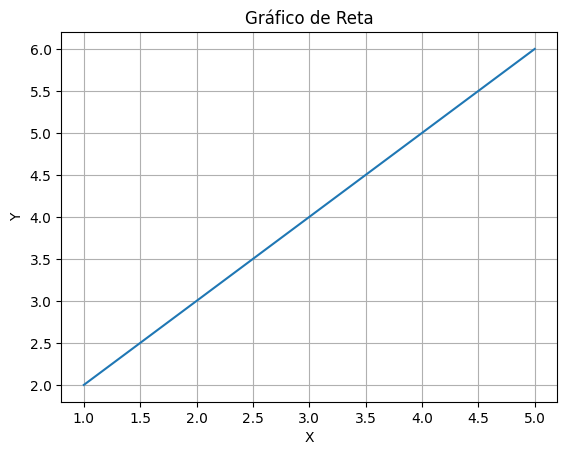

In [30]:
line = PlotStraightLine((1, 2), (5, 6))
line.desenhar_linha()

# Programação Funcional

### 1) Faça um loop para encontrar todos os multiplos de 3 cujo o último algarismo é 1 no intervalo [0,n]. Compare o tempo de execução de um loop convencional com um loop usando compreensão de listas.

In [54]:
import time

# Loop convencional
def encontrar_mult(n):
    multiplos = []
    for i in range(n + 1):
        if i % 3 == 0 and i % 10 == 1:
            multiplos.append(i)
    return multiplos

# Compreensão de listas
def encontrar_mult_lc(n):
    return [i for i in range(n + 1) if i % 3 == 0 and i % 10 == 1]

n = 10000000
mult = encontrar_mult(n)
mult_lc = encontrar_mult_lc(n)
print(mult[:10], len(mult))
print(mult_lc[:10], len(mult_lc))

# Comparando os resultados e tempos de execução
print(timeit.timeit(lambda: encontrar_mult(n), number=1), "segundos\n")
print(timeit.timeit(lambda: encontrar_mult_lc(n), number=1), "segundos\n")

3.3324942908948287 segundos

3.2524493749951944 segundos



### 2) Use compreensão de listas para encontrar todos os pares (i,j) tal que i ∈ {1,2,3,4,5} e j ∈ {a,b,c}.

In [ ]:
print([i for i in range(1,6)])
pairs = [(i, j) for i in range(1, 6) for j in ['a', 'b', 'c']]
print(pairs)

### 3) Dado um número real e uma lista com os coeficientes de um polinômio [a0,...,an], use map e reduce para calcular o valor de um polinômio num ponto.

In [43]:
from functools import reduce

def avaliar_polynomial(x, coefs):
    potencias = range(len(coefs))
    termos = map(lambda potencia, coef: coef * (x ** potencia), potencias, coefs)
    resultado = reduce(lambda a, b: a + b, termos) # equivalente a sum(termos)
    return resultado

# Exemplo de uso
x = 2.5
coeficientes = [2, -1, 3] 

valor_polinomio = avaliar_polynomial(x, coeficientes)
print("O valor do polinômio em x =", x, "é", valor_polinomio)

O valor do polinômio em x = 2.5 é 18.25


### 4) Crie uma closure para multiplicar números por um número fixo.

In [44]:
def multiplicador_por_numero_fixo(numero_fixo):
    def multiplicar(numero):
        return numero * numero_fixo
    return multiplicar

# Exemplo de uso
multiplicar_por_5 = multiplicador_por_numero_fixo(5)
resultado = multiplicar_por_5(10)
print(resultado)  # Output: 50

50


### 5) Escreva um código seguindo os princípios de programação funcional para encontrar todos os primos em um determinado intervalo.

In [46]:
def checar_primo(n):
    if n < 2:
        return False
    # checa se é divisível por algum número entre 2 e raiz(n)
    for i in range(2, math.isqrt(n) + 1): 
        if n % i == 0:
            return False
    return True

def encontrar_primos(start, end):
    primos = filter(checar_primo, range(start, end + 1))
    return list(primos)

primos = encontrar_primos(1, 20)
print(f"Primos no intervalo: {primos}")

Primos no intervalo: [2, 3, 5, 7, 11, 13, 17, 19]
